# Data and Library Imports


In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 79.0 MB/s eta 0:00:00


In [59]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import folium
import folium.plugins

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
tif_files = [
    'Data/Soil_Geochem/Soil_IDW_Ag/Soil_IDW_Ag.tif',  #Silver
    'Data/Soil_Geochem/Soil_IDW_As/Soil_IDW_As.tif',  #Arsenic
    'Data/Soil_Geochem/Soil_IDW_Al/Soil_IDW_Al.tif',  #Aluminum
    'Data/Soil_Geochem/Soil_IDW_Co/Soil_IDW_Co.tif',  #Cobalt
    'Data/Soil_Geochem/Soil_IDW_Bi/Soil_IDW_Bi.tif',  #Bismuth
    'Data/Soil_Geochem/Soil_IDW_Cu/Soil_IDW_Cu.tif',  #Copper
    'Data/Soil_Geochem/Soil_IDW_Au/Soil_IDW_Au.tif',  #Gold
    'Data/Soil_Geochem/Soil_IDW_Zn/Soil_IDW_Zn.tif',  #Zinc
    'Data/Soil_Geochem/Soil_IDW_Pb/Soil_IDW_Pb.tif',  #Lead
    'Data/Soil_Geochem/Soil_IDW_Ni/Soil_IDW_Ni.tif',  #Nickel
    'Data/Soil_Geochem/Soil_IDW_Mo/Soil_IDW_Mo.tif',  #Molybdenum
    'Data/Soil_Geochem/Soil_IDW_W/Soil_IDW_W.tif',    #Tungsten
    'Data/Soil_Geochem/Soil_IDW_Hg/Soil_IDW_Hg.tif',  #Mercury
    'Data/Soil_Geochem/Soil_IDW_Sn/Soil_IDW_Sn.tif',  #Tin
    'Data/Soil_Geochem/Soil_IDW_Sb/Soil_IDW_Sb.tif',  #Antimony
    'Data/Soil_Geochem/Soil_IDW_Te/Soil_IDW_Te.tif'   #Tellurium
]

#stack rasters
rasters = []
for tif in tif_files:
    with rasterio.open(tif) as src:
        array = src.read(1)  #first band
        array = (array - np.min(array)) / (np.max(array) - np.min(array))  #Normalize 0-1
        rasters.append(array)

#Convert list to NumPy array
cnn_input = np.stack(rasters, axis=-1)

print("CNN Input Shape:", cnn_input.shape) #height width of raster and number of minerals

CNN Input Shape: (703, 598, 16)


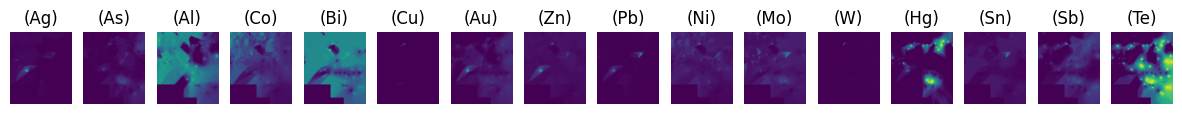

In [44]:
fig, axes = plt.subplots(1, len(tif_files), figsize=(15, 5))
titles = ["(Ag)", "(As)", "(Al)", "(Co)", "(Bi)", "(Cu)", "(Au)", "(Zn)", "(Pb)", "(Ni)", "(Mo)", "(W)", "(Hg)", "(Sn)", "(Sb)", "(Te)"]

for i, ax in enumerate(axes):
    ax.imshow(cnn_input[:, :, i], cmap='viridis')
    ax.set_title(titles[i])
    ax.axis("off")

plt.show()

In [51]:
#setting label or target of model
gold_index = tif_files.index('Data/Soil_Geochem/Soil_IDW_Au/Soil_IDW_Au.tif')
gold_raster = rasters[gold_index]

# Model Building and Testing

In [52]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding='same', input_shape=(cnn_input.shape[0], cnn_input.shape[1], cnn_input.shape[2])),
    Conv2D(64, (3, 3), activation="relu", padding='same'),
    Conv2D(1, (3, 3), activation="sigmoid", padding='same')
])

#compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#set label as gold raster
labels = gold_raster.reshape(cnn_input.shape[0], cnn_input.shape[1], 1)

#reshape data for model input
cnn_input = cnn_input.reshape(1, cnn_input.shape[0], cnn_input.shape[1], cnn_input.shape[2])
labels = labels.reshape(1, labels.shape[0], labels.shape[1], labels.shape[2])

#Train Model
model.fit(cnn_input, labels, epochs=10, batch_size=4)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2936 - loss: 0.6740
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3001 - loss: 0.6214
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3004 - loss: 0.5735
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3004 - loss: 0.5277
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3004 - loss: 0.4829
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3004 - loss: 0.4385
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3004 - loss: 0.3960
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3004 - loss: 0.3575
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3004 - loss: 0.3253
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3004 - loss: 0.3016


In [62]:
# Assuming 'model' is your trained CNN model and 'cnn_input' is your input data
predictions = model.predict(cnn_input)

# Reshape predictions to match the original raster dimensions
predictions = predictions.reshape(gold_raster.shape)

predictions = (predictions - np.min(predictions)) / (np.max(predictions) - np.min(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


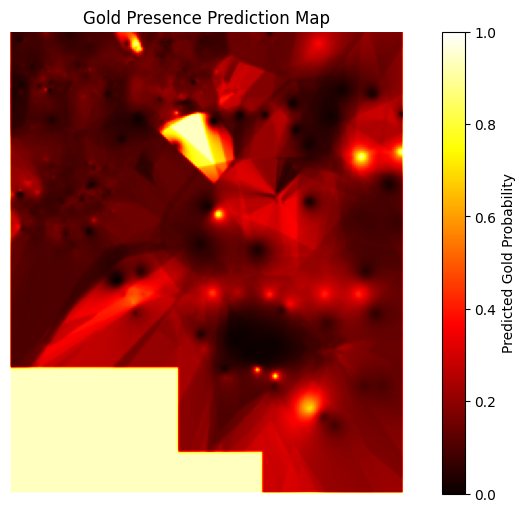

In [64]:
plt.figure(figsize=(10, 6))
plt.imshow(predictions, cmap="hot", interpolation="nearest")
plt.colorbar(label="Predicted Gold Probability")
plt.title("Gold Presence Prediction Map")
plt.axis("off")  # Hide axes for clean visualization
plt.show()